# Problem Statemetent

In this project, we have created a model to identify best Crop as accurately as possible. It is important to understand and identify major factors affecting to Crop forming. Considering these factors as attributes and giving values to machine to predict right crops as listed in dataset. Here, we are applying different Machine Learning algorithms to make no. of different models and select best and accurate model for Crop prediction.

# Importing Libraries.

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset.


In [2]:
rowdata= pd.read_csv('Farming_data_set.csv')

# Preporcessing on Dataset.

1. Printing first 10 rows.

In [3]:
rowdata.head(10)

,Nitrogen,Phosporus,Potassium,temperature,humidity,ph,rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


2. Printing last 10 rows.

In [4]:
rowdata.tail(10)

,Nitrogen,Phosporus,Potassium,temperature,humidity,ph,rainfall,Crops
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


3. Shape of dataset.

In [5]:
rowdata.shape

(2200, 8)

4. Data types of all attributes.

In [6]:
rowdata.dtypes

Nitrogen         int64
Phosporus        int64
Potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crops           object
dtype: object

In [7]:
type(rowdata)

pandas.core.frame.DataFrame

5. Statistical values from dataset.

In [8]:
rowdata.describe()

,Nitrogen,Phosporus,Potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


6. Names of all columns.

In [9]:
rowdata.columns

Index(['Nitrogen', 'Phosporus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall ', 'Crops'],
      dtype='object')

7. Types of Crops available in dataset.

In [10]:
rowdata['Crops'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

8. No. of crops.

In [11]:
rowdata['Crops'].nunique()

22

9. Count of each Crops.

In [12]:
rowdata['Crops'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: Crops, dtype: int64

10. Count of Non-null rows.

In [13]:
rowdata.isnull().count()

Nitrogen       2200
Phosporus      2200
Potassium      2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
Crops          2200
dtype: int64

# Exploratory Data Analysis
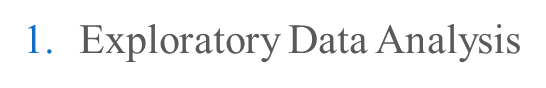

1. Finding correlation between all attributes.

In [14]:
correlation=rowdata.corr()
correlation

,Nitrogen,Phosporus,Potassium,temperature,humidity,ph,rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosporus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


2. Correlation using heatmap.

<AxesSubplot: >

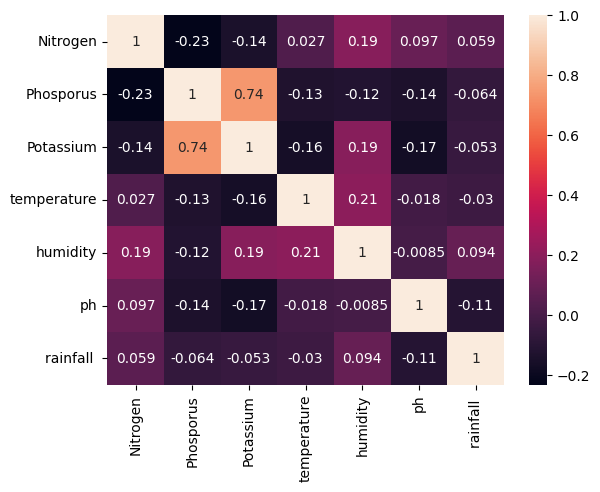

In [15]:
sns.heatmap(correlation,annot=True,xticklabels=True)

3. Count of Crops using pie chart.

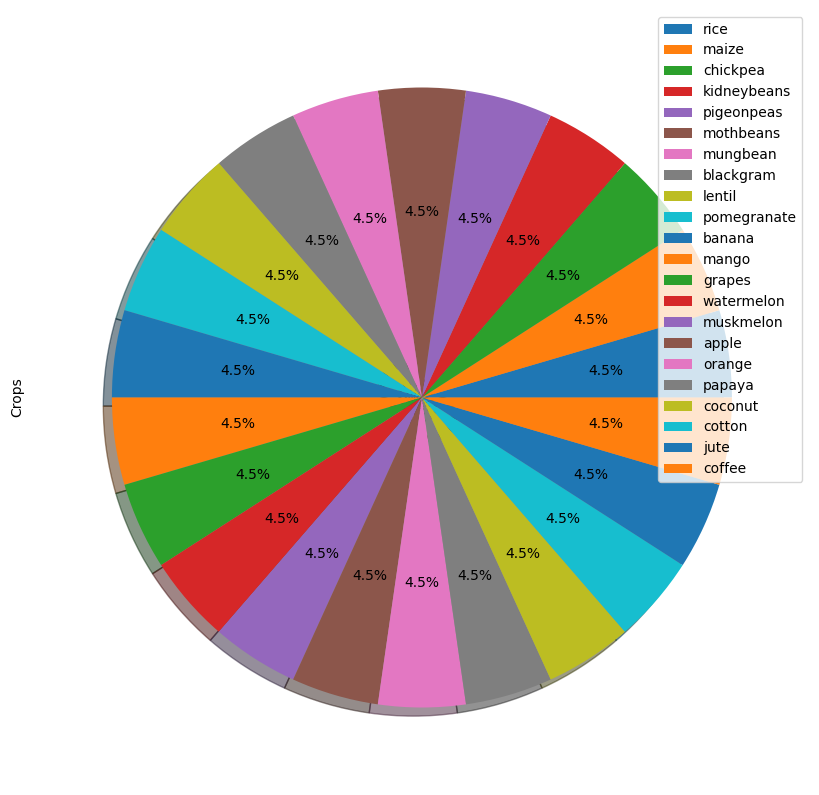

In [16]:
fig,ax=plt.subplots(figsize=(10,50))
rowdata['Crops'].value_counts().plot.pie (autopct='%1.1f%%', ax = ax, shadow=True, labeldistance=None)
ax.legend(rowdata['Crops'].unique())
plt.show()

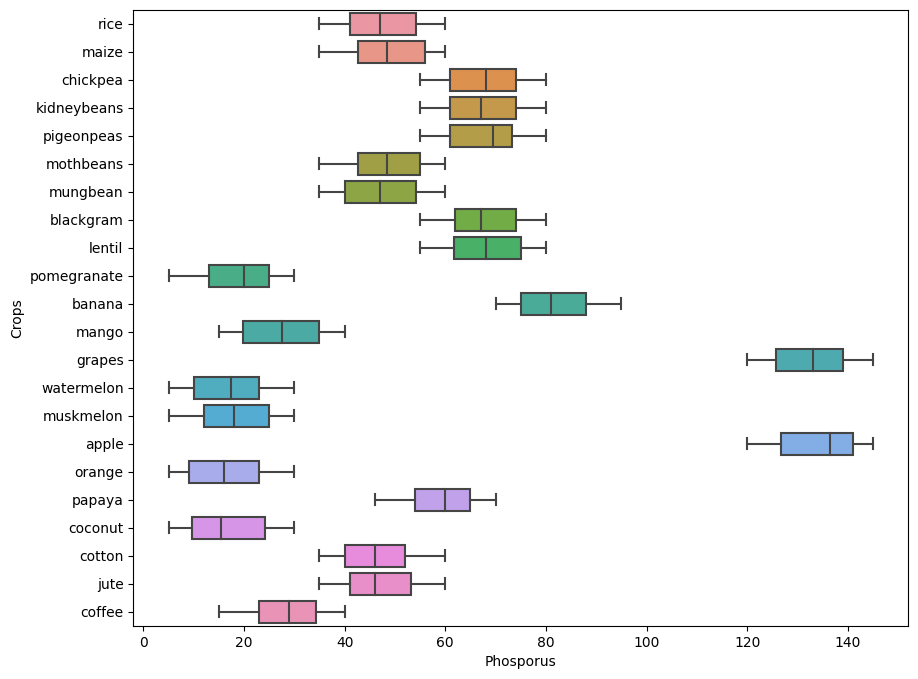

In [20]:
# Box Plot for all features-Phosporus w.r.t. Crops.
plt.figure(figsize=(10,8))
sns.boxplot(y=rowdata['Crops'],x=rowdata['Phosporus'])
plt.show()

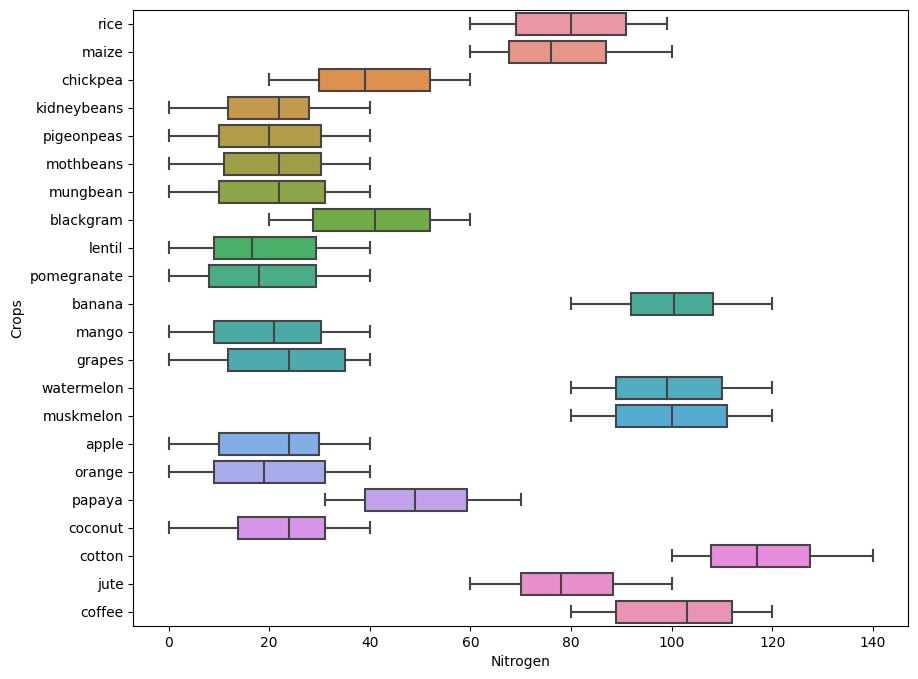

In [17]:
# Exploratory Data Analysis.

plt.figure(figsize=(10,8))
sns.boxplot(y=rowdata['Crops'],x=rowdata['Nitrogen'])
plt.show()

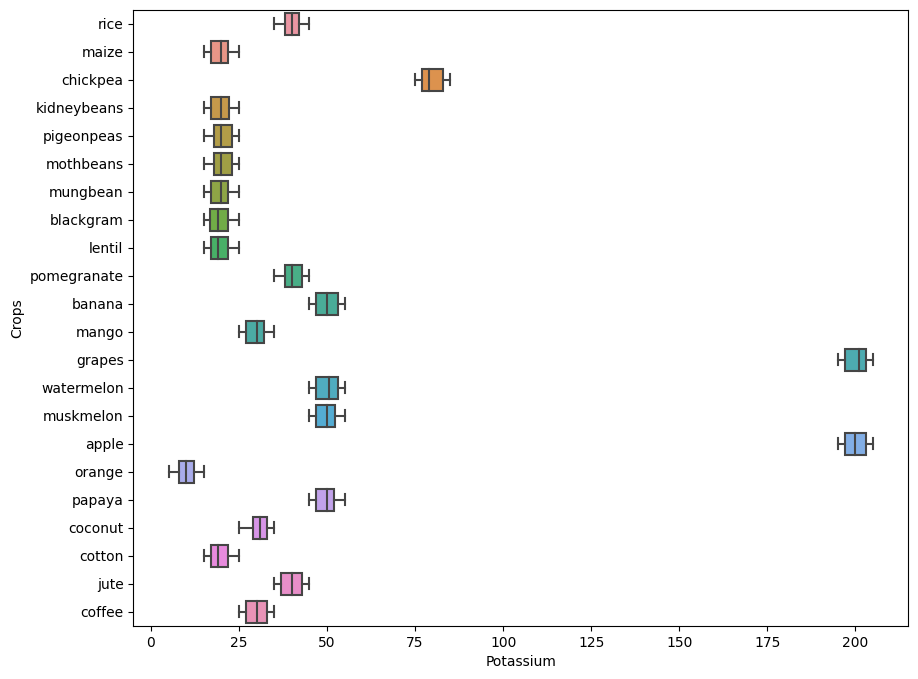

In [18]:
# Exploratory Data Analysis.

plt.figure(figsize=(10,8))
sns.boxplot(y=rowdata['Crops'],x=rowdata['Potassium'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

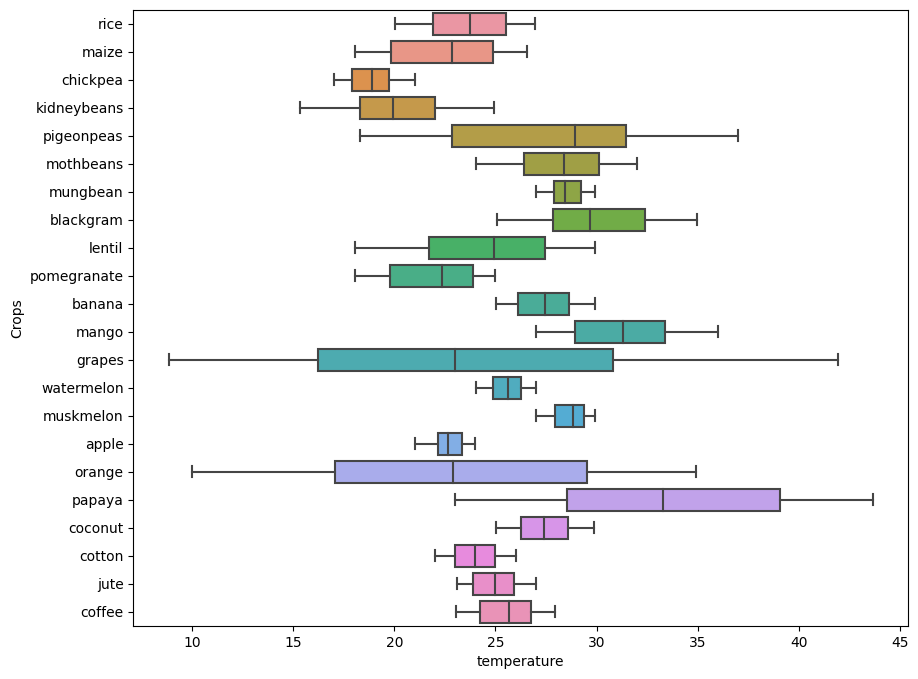

In [19]:
# Exploratory Data Analysis.
()
plt.figure(figsize=(10,8))
sns.boxplot(y=rowdata['Crops'],x=rowdata['temperature'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

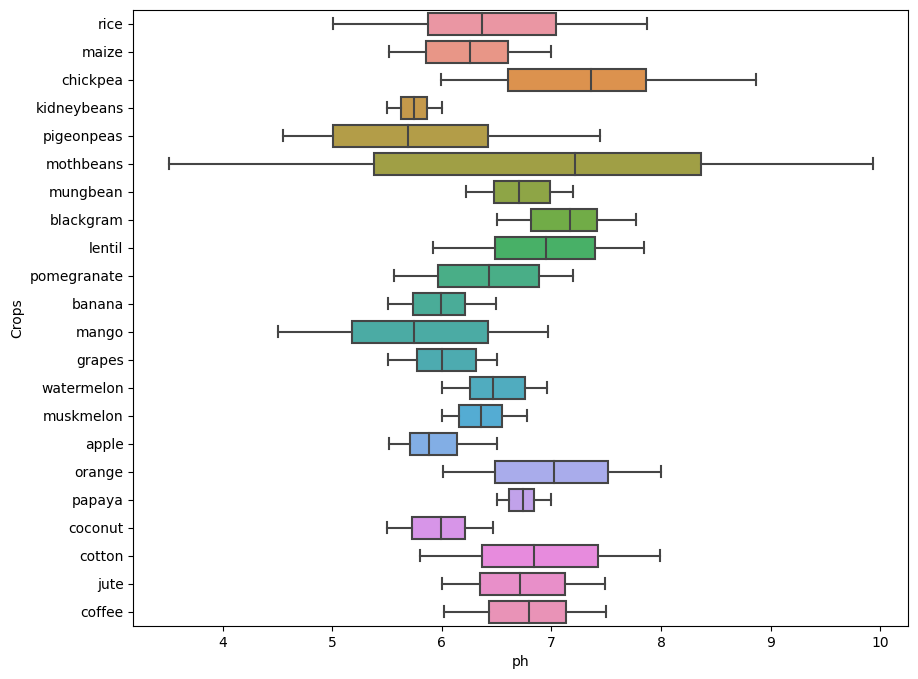

In [20]:
# Exploratory Data Analysis.
()
plt.figure(figsize=(10,8))
sns.boxplot(y=rowdata['Crops'],x=rowdata['ph'])
plt.show

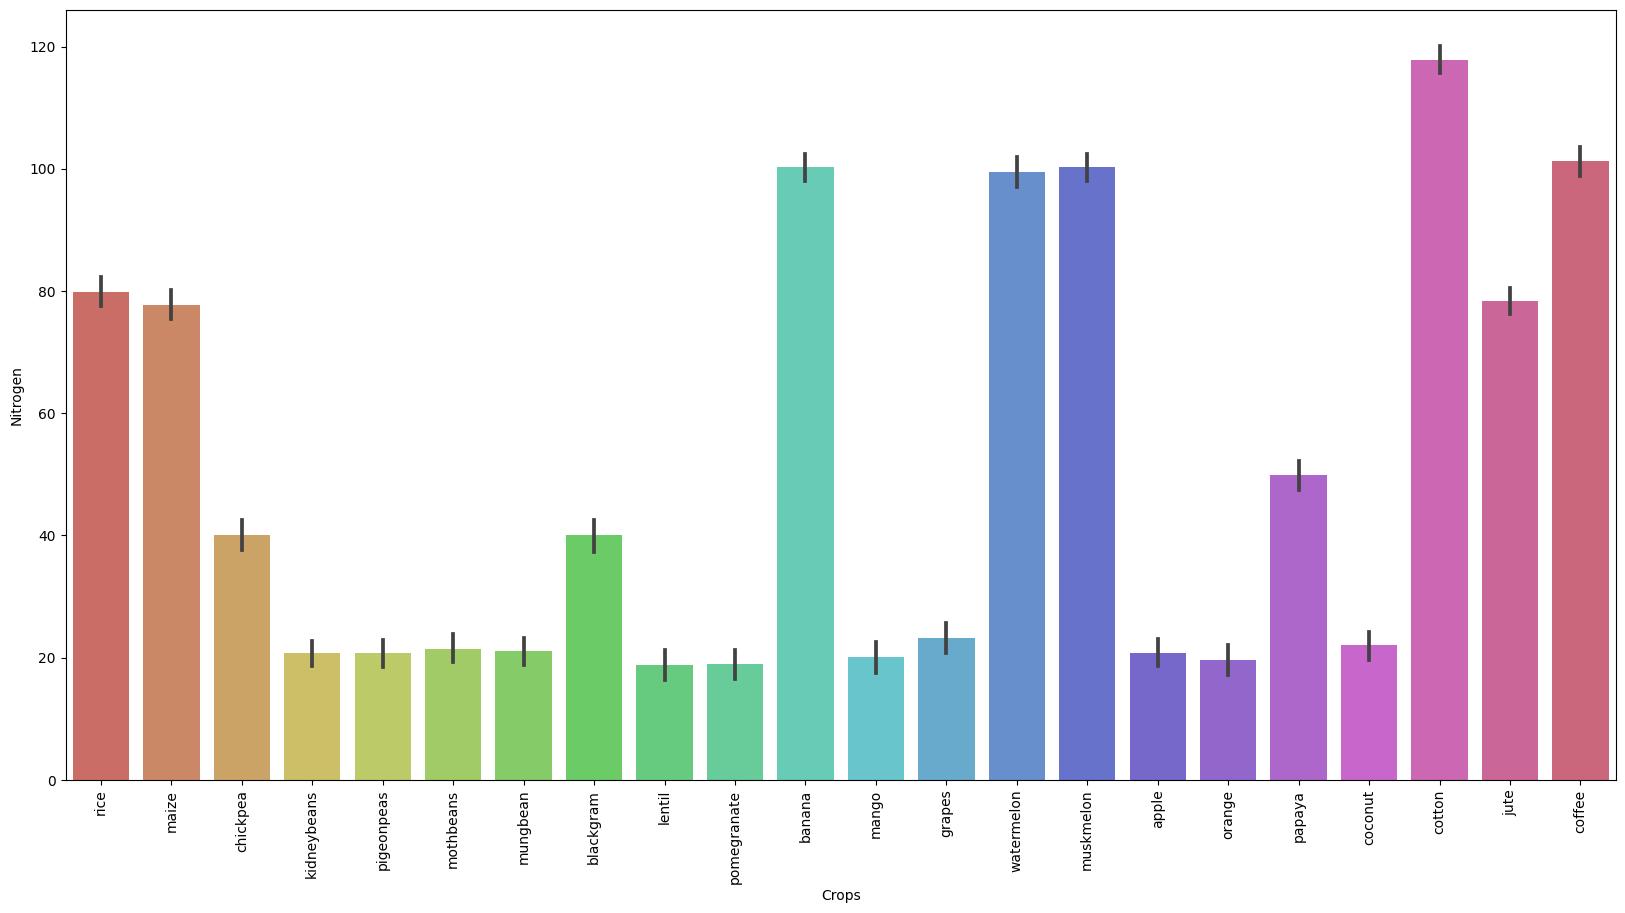

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(y="Nitrogen" , x="Crops" , data=rowdata, palette='hls')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot: xlabel='temperature', ylabel='Crops'>

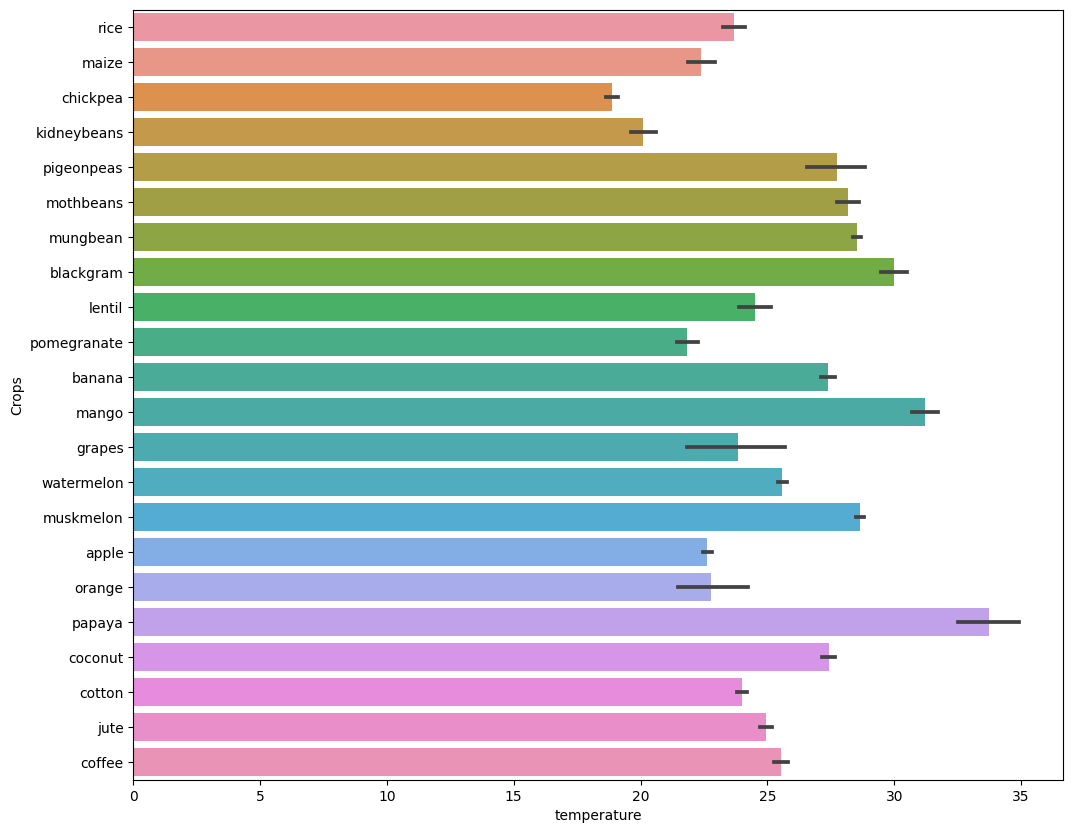

In [22]:
plt.figure(figsize = (12, 10))
sns.barplot(data = rowdata , y = "Crops" , x ="temperature")

# Separating Features and target label.

In [23]:
# Dictionary of Column name with associated index.
idx_dic = {}
for col in rowdata.columns:
    idx_dic[col] = rowdata.columns.get_loc(col)
print(idx_dic)

{'Nitrogen': 0, 'Phosporus': 1, 'Potassium': 2, 'temperature': 3, 'humidity': 4, 'ph': 5, 'rainfall ': 6, 'Crops': 7}


In [24]:
features= rowdata.drop(rowdata.columns[[6,7]],axis=1)
features

,Nitrogen,Phosporus,Potassium,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064
2196,99,15,27,27.417112,56.636362,6.086922
2197,118,33,30,24.131797,67.225123,6.362608
2198,117,32,34,26.272418,52.127394,6.758793


In [25]:
target=rowdata['Crops']
target

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: Crops, Length: 2200, dtype: object

In [26]:
# Splitting into train and test data.

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [27]:
print('Xtrain :',Xtrain.shape, '\nXtest :',Xtest.shape,'\nYtrain :',Ytrain.shape, '\nYtest :',Ytest.shape)

Xtrain : (1760, 6) 
Xtest : (440, 6) 
Ytrain : (1760,) 
Ytest : (440,)


In [33]:
# Initialzing empty lists to append all model's name and corresponding accuracy.
ModelTypes = [] # Algorithms used for model.
ModelAccuracy = []


# Model Testing with data set.

# 1. Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes_1= GaussianNB()

NaiveBayes_1

GaussianNB()

# Train Model

In [29]:
NaiveBayes_1.fit(Xtrain,Ytrain)

GaussianNB()

In [30]:
predicted_values_1= NaiveBayes_1.predict(Xtest)
predicted_values_1[:20]

array(['coffee', 'pomegranate', 'pomegranate', 'cotton', 'mungbean',
       'coffee', 'watermelon', 'coconut', 'pigeonpeas', 'mango',
       'chickpea', 'jute', 'papaya', 'mothbeans', 'mango', 'maize',
       'orange', 'blackgram', 'cotton', 'orange'], dtype='<U11')

In [31]:
x=metrics.accuracy_score(Ytest,predicted_values_1)
print('GNB Accuracy =' ,x*100,'%')

GNB Accuracy = 96.5909090909091 %


In [32]:
inputs= np.array([[90,42,43,20.87,82.002,6.50]])
prediction_GNB= NaiveBayes_1.predict(inputs)
print(prediction_GNB)


# Nitrogen, Phosporus, Potassium, temperature,humidity,ph,rainfall ,Crops
# 90, 42, 43, 20.87974371,82.00274423,6.502985292,202.9355362,rice

['rice']


In [33]:
inputs= np.array([[100,48,16,25.77,67.22,5.54]])
prediction_GNB= NaiveBayes_1.predict(inputs)
print(prediction_GNB)

# 100,48,16,25.71895816,67.22190688,5.54990242,74.51490791,maize


['maize']


In [34]:
ModelTypes.append('1. Naive Bayes ')
ModelAccuracy.append(x*100)

NameError: name 'ModelTypes' is not defined

In [35]:
print([ModelTypes, ModelAccuracy])

NameError: name 'ModelTypes' is not defined

In [42]:
# Evalution matrix
print(classification_report(Ytest,predicted_values_1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.81      0.81      0.81        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.82      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.87      0.87      0.87        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      0.96      0.98        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# 2. KNN Classifiers

In [43]:
# without normalization.
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()


In [44]:
Knn.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [45]:
knn_pred =Knn.predict(Xtest)

In [46]:
x=metrics.accuracy_score(Ytest,knn_pred)
print('2. KNN Accuracy =' ,x*100,'%')

2. KNN Accuracy = 92.5 %


In [47]:
inputs= np.array([[90,42,43,20.87,82.002,6.50]])
prediction_knn= Knn.predict(inputs)
print(prediction_knn)


# Nitrogen, Phosporus, Potassium, temperature,humidity,ph,rainfall ,Crops
# 90, 42, 43, 20.87974371,82.00274423,6.502985292,202.9355362,rice

['rice']


In [48]:
# Data normalization with sklearn :
from sklearn.preprocessing import MinMaxScaler

#MinMax Scaling/Normalization range lies between 0 to 1 :
norm= MinMaxScaler().fit(Xtrain)
X_train_norm =norm.transform(Xtrain)
X_train_norm

array([[0.80714286, 0.23571429, 0.1       , 0.37805582, 0.76071051,
        0.60393611],
       [0.2       , 0.21428571, 0.085     , 0.59411218, 0.84542489,
        0.56790336],
       [0.07857143, 0.4       , 0.08      , 0.28113814, 0.10209972,
        0.31527862],
       ...,
       [0.16428571, 0.24285714, 0.085     , 0.58625323, 0.7899586 ,
        0.52253655],
       [0.83571429, 0.54285714, 0.24      , 0.59344273, 0.74592957,
        0.31147497],
       [0.27857143, 0.13571429, 0.045     , 0.62350543, 0.89407786,
        0.57298809]])

In [49]:
# KNN with normalization.

X_train_norm =norm.transform(Xtrain)
X_train_norm
X_test_norm = norm.transform(Xtest)

knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train_norm,Ytrain)
predicted_values=knn2.predict(X_test_norm)
x2 = metrics.accuracy_score(Ytest, predicted_values)
print("KNN models Accuracy is:" ,x2*100)


KNN models Accuracy is: 92.5


In [50]:
ModelTypes.append('2. KNN ')
ModelAccuracy.append(x2*100)



In [51]:
print(ModelTypes, ModelAccuracy)

['1. Naive Bayes ', '2. KNN '] [96.5909090909091, 92.5]


# 3. Support Vector Machine(SVM)

In [52]:
features.columns

Index(['Nitrogen', 'Phosporus', 'Potassium', 'temperature', 'humidity', 'ph'], dtype='object')

In [53]:
target.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [54]:
df0=rowdata[:100]
df1=rowdata[101:200]
df3=rowdata[201:300]
df4=rowdata[301:400]

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

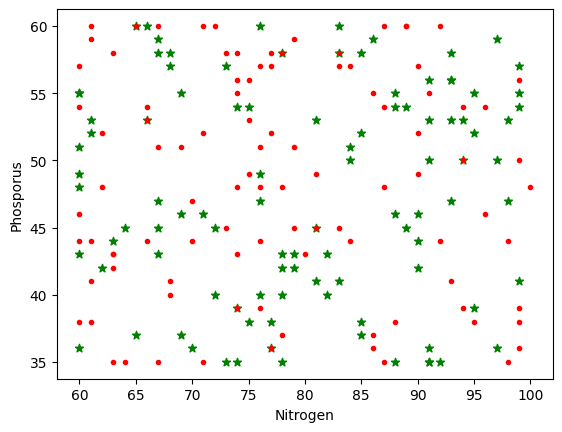

In [56]:
plt.xlabel('Nitrogen')
plt.ylabel('Phosporus')
plt.scatter(df0['Nitrogen'],df0['Phosporus'], color='green',marker = '*')
plt.scatter(df1['Nitrogen'],df1['Phosporus'], color='Red',marker = '.')

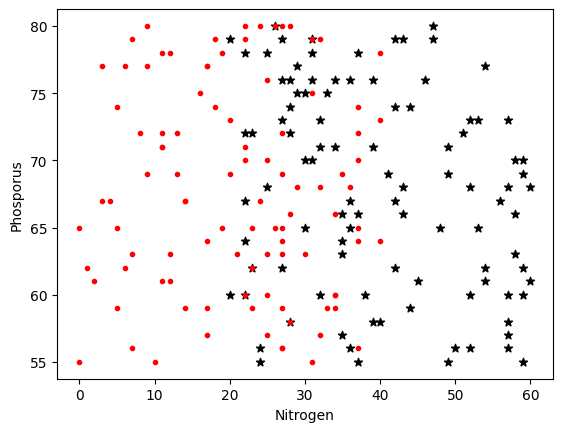

In [57]:
plt.xlabel('Nitrogen')
plt.ylabel('Phosporus')
plt.scatter(df3['Nitrogen'],df3['Phosporus'], color='Black',marker = '*')
plt.scatter(df4['Nitrogen'],df4['Phosporus'], color='Red',marker = '.')

In [58]:
from sklearn.svm import SVC

In [59]:
# Data normalization with sklearn :
from sklearn.preprocessing import MinMaxScaler

#MinMax Scaling/Normalization range lies between 0 to 1 :
norm= MinMaxScaler().fit(Xtrain)
X_train_norm =norm.transform(Xtrain)
X_train_norm

array([[0.80714286, 0.23571429, 0.1       , 0.37805582, 0.76071051,
        0.60393611],
       [0.2       , 0.21428571, 0.085     , 0.59411218, 0.84542489,
        0.56790336],
       [0.07857143, 0.4       , 0.08      , 0.28113814, 0.10209972,
        0.31527862],
       ...,
       [0.16428571, 0.24285714, 0.085     , 0.58625323, 0.7899586 ,
        0.52253655],
       [0.83571429, 0.54285714, 0.24      , 0.59344273, 0.74592957,
        0.31147497],
       [0.27857143, 0.13571429, 0.045     , 0.62350543, 0.89407786,
        0.57298809]])

In [60]:
# transform testing dataset:
X_test_norm = norm.transform(Xtest)

In [61]:
SVM =SVC(kernel='poly', degree=3, C=1) 
SVM.fit(X_train_norm,Ytrain)

SVC(C=1, kernel='poly')

In [62]:
predicted_values=SVM.predict(X_test_norm)
x3 = metrics.accuracy_score(Ytest, predicted_values)
x3

print('Accuracy of SVM is :', x3*100)

Accuracy of SVM is : 93.18181818181817


In [63]:
ModelTypes.append('3. SVM')
ModelAccuracy.append(x3*100)


In [64]:
print(classification_report(Ytest, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.81      0.81      0.81        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      0.50      0.64        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.86      0.83      0.84        23
       maize       1.00      0.95      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      0.96      0.98        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# 4. Logistic Regression


In [65]:

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=50)

LR.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=50)

In [66]:
predicted_values_LR = LR.predict(Xtest)
LRx= metrics.accuracy_score(Ytest,predicted_values_LR)
print('Logistic Regression  ',LRx*100,'%')

Logistic Regression   87.27272727272727 %


In [67]:
ModelTypes.append('4. Logistic Regression ')
ModelAccuracy.append(LRx*100)



# 5.Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(random_state=42)

In [69]:
predicted_values_RF =RF.predict(Xtest)
RFx =metrics.accuracy_score(Ytest, predicted_values_RF)

In [70]:
print("Random Forest Accuracy = ",RFx*100,'%')

Random Forest Accuracy =  96.81818181818181 %


In [71]:

RF = RandomForestClassifier(criterion='gini', random_state=42)
RF.fit(Xtrain,Ytrain)

predicted_values_RF =RF.predict(Xtest)
RFx =metrics.accuracy_score(Ytest, predicted_values_RF)

print("Random Forest Accuracy = ",RFx*100,'%')

Random Forest Accuracy =  96.81818181818181 %


In [72]:
ModelTypes.append('5. Random Forest')
ModelAccuracy.append(RFx*100)


In [73]:
print(classification_report(Ytest,predicted_values_RF))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.88      0.88        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.92      0.82      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.91      0.91      0.91        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.94      0.89      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

# 6. XG boost

In [74]:
rowdata.columns

Index(['Nitrogen', 'Phosporus', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall ', 'Crops'],
      dtype='object')

In [75]:
x = rowdata[['Nitrogen', 'Phosporus', 'Potassium', 'temperature', 'humidity']]


In [76]:
df1=rowdata['Crops']
df1

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: Crops, Length: 2200, dtype: object

In [77]:
from sklearn.preprocessing import LabelEncoder
Ly= LabelEncoder()
y1=Ly.fit_transform(df1)

In [78]:
y1

array([20, 20, 20, ...,  5,  5,  5])

In [79]:
Ly.classes_

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [80]:
Ly.inverse_transform([1,2,3])

array(['banana', 'blackgram', 'chickpea'], dtype=object)

In [81]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test=train_test_split(x ,y1,test_size=0.3 ,random_state=50)


In [82]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [83]:
predictions = xgb_model.predict(x_test)
predictions[0:10]

array([ 9,  0, 17, 16,  2,  4, 19, 18, 21,  4], dtype=int64)

In [84]:
Ly.inverse_transform([9])

array(['kidneybeans'], dtype=object)

In [85]:
from sklearn.metrics import accuracy_score
xb = accuracy_score(y_test , predictions)
print("XGboost's Accuracy is :", xb *100)

XGboost's Accuracy is : 94.39393939393939


In [86]:
ModelTypes.append('6.XGBoosting')
ModelAccuracy.append(xb*100)


# 7. Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion='entropy', random_state=2,max_depth=10)

In [89]:
DecisionTree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=2)

In [90]:
predicted_values = DecisionTree.predict(Xtest)

In [91]:
x1 = (metrics.accuracy_score(Ytest, predicted_values))
print(x1)

0.9522727272727273


In [92]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.70      1.00      0.82        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.79      0.82      0.81        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.74      0.85        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.94      0.84      0.89        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [93]:
ModelTypes.append('7.Decision Tree')
ModelAccuracy.append(x1*100)


# Model Accuracy Comparision.

In [94]:
#Accuracy of Each Algorithm:
accuracy_model= dict(zip(ModelTypes,ModelAccuracy))
for k,v in accuracy_model.items():
        print(k,"=",v)

1. Naive Bayes  = 96.5909090909091
2. KNN  = 92.5
3. SVM = 93.18181818181817
4. Logistic Regression  = 87.27272727272727
5. Random Forest = 96.81818181818181
6.XGBoosting = 94.39393939393939
7.Decision Tree = 95.22727272727273


<AxesSubplot: title={'center': 'Accuracy Comparision'}, xlabel='Accuracy of Algorithms', ylabel='Model Name'>

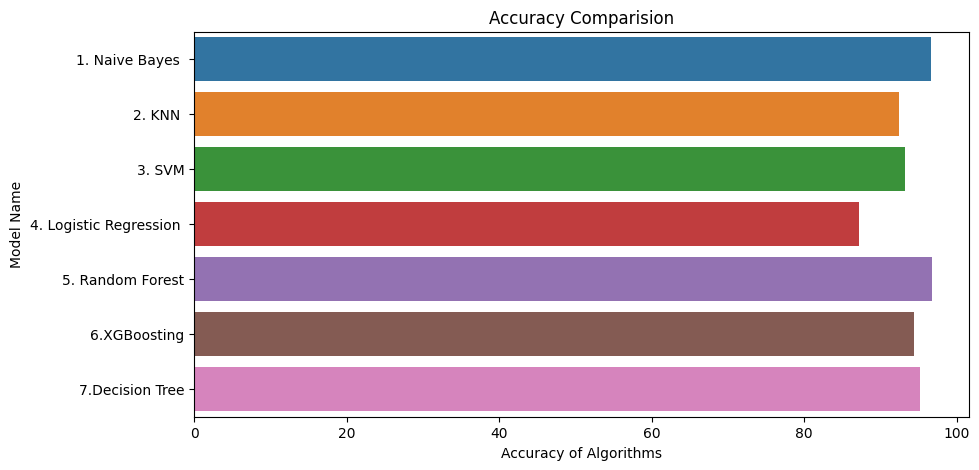

In [95]:
# Accuracy Comparison.

plt.figure(figsize=[10,5])
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy of Algorithms')
plt.ylabel('Model Name')
sns.barplot(x=ModelAccuracy,y=ModelTypes)

# Final Crop prediction using Random Forest.

In [96]:

data = np.array([[40,72,77,17.02498456,16.98861173,7.48]])
predicted_values_RF =RF.predict(data)
print(predicted_values_RF)

['chickpea']


In [97]:
data = np.array([[25,64,20,33.15,32.45,4.480]])
predicted_values_RF =RF.predict(data)
print(predicted_values_RF)

['pigeonpeas']


In [98]:
data = np.array([[4,36,22,27,96,7]])
predicted_values_RF =RF.predict(data)
print(predicted_values_RF)

['mungbean']


In [99]:
data = np.array([[56,79,15,29,63,8]])
predicted_values_RF =RF.predict(data)
print(predicted_values_RF)

['blackgram']


In [100]:
data = np.array([[32,76,15,28,63,7]])
predicted_values_RF =RF.predict(data)
print(predicted_values_RF)

['lentil']


In [101]:
data = np.array([[6,18,37,19,90,6]])
predicted_values_RF =RF.predict(data)
print(predicted_values_RF)

['pomegranate']


In [102]:
data = np.array([[106,85,53,27,78,5.91]])
predicted_values_RF =RF.predict(data)
print(predicted_values_RF)

['banana']


In [103]:
data = np.array([[13,72,21,	24.879744,21.002744,6]])
prediction = Knn.predict(data)
print(prediction)

['kidneybeans']


In [104]:
data = np.array([[15,27, 28, 33.603016, 46.87]])
prediction = xgb_model.predict(data)
print(prediction)

[12]


In [105]:
Ly.inverse_transform([12])

array(['mango'], dtype=object)

# Score between Train data and Test data by model using Random forest.

In [109]:
# RFxt =RF.score(Xtrain,Ytrain)
print("Random Forest Accuracy On trainning data= ",RFxt*100,'%')
RFxt =RF.score(Xtest,Ytest)
print("Random Forest Accuracy On testing data= ",RFxt*100,'%')

Random Forest Accuracy On trainning data=  96.81818181818181 %
Random Forest Accuracy On testing data=  96.81818181818181 %
